# **훈련 세트와 테스트 세트로 나누어야 함**
* fit() 메소드로 분류(훈련)를 했는데 테스트를 동일한 데이터로 진행하면 안 됨

In [1]:
import sklearn
import tensorflow

In [2]:
# 도미데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0,
                30.7, 31.0, 31.0, 31.5, 32.0, 32.0 , 32.0, 33.0, 33.0,
                33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0,
                36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
                450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 340.0,
                600.0, 700.0, 610.0, 650.0, 575.0, 685.0,
                620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
                920.0, 955.0, 925.0, 975.0, 950.0]

In [3]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8,
                11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9,
                9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
# 도미와 빙어 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
# 2차원 리스트로 변경
fish_data = [[ l, w ] for l, w in zip(length, weight)]
# 정답 준비
fish_target = [1] * 35 + [0] * 14

In [5]:
# 훈련세트 35개
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 세트 14개
test_input = fish_data[35:]
test_target = fish_target[35:]

### **테스트 세트에서 평가했을 때의 결과**
* 잘못된 훈련 데이터
    * 샘플링 편향 현상 나타남
* numpy로 변환 후 데이터 섞어주기

In [9]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

In [10]:
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   390. ]
 [  31.   450. ]
 [  31.5  500. ]
 [  32.   475. ]
 [  32.   500. ]
 [  32.   340. ]
 [  33.   600. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [17]:
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

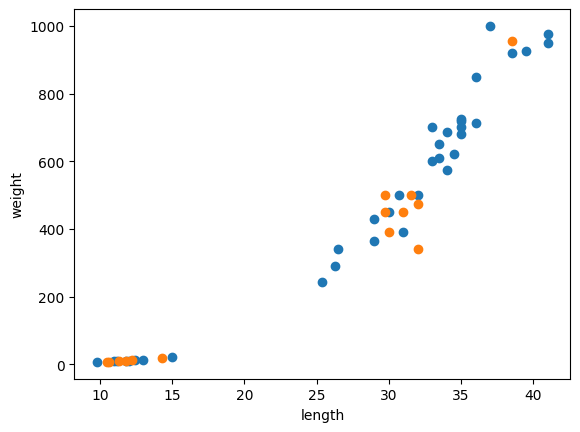

In [18]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

# **데이터 전처리**

In [21]:
fish_data = np.column_stack((length, weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [22]:
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  390. ],
       [  31. ,  450. ],
       [  31.5,  500. ],
       [  32. ,  475. ],
       [  32. ,  500. ],
       [  32. ,  340. ],
       [  33. ,  600. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [25]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data,
                                fish_target, stratify = fish_target, random_state = 42)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [27]:
print(kn.predict([[25, 150]]))
# 빙어로 판별됨

[0.]


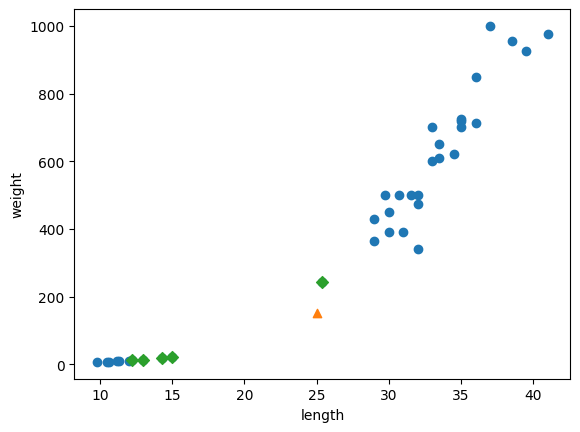

In [30]:
# 이웃의 샘플 index를 뽑아보자
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1],
               marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### **빙어로 판별된 도미, 도미와 가까이 있는데 왜?**
* 기준 scale을 맞춰주지 않아서

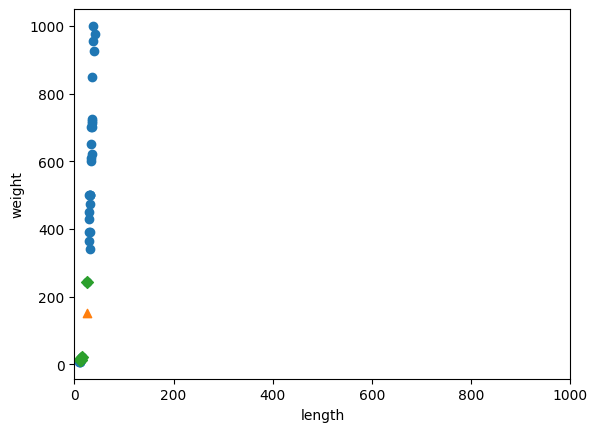

In [32]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1],
               marker = 'D')
plt.xlim((0, 1000))   ### <------ 추가
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [33]:
# 표준점수로 바꾸기
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)
print(mean, std)

train_scaled = (train_input - mean) / std

[ 27.29722222 442.70833333] [  9.98244253 319.83457649]


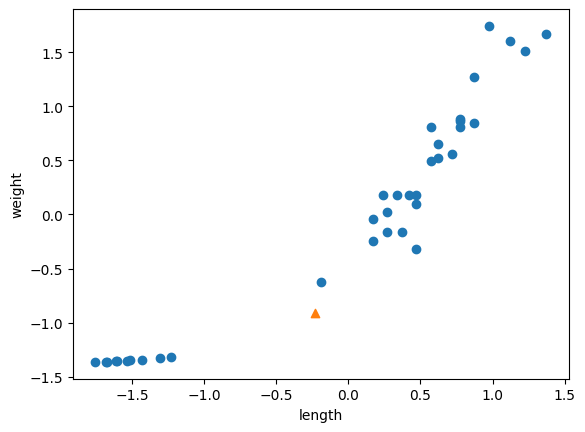

In [34]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [36]:
# 전처리 데이터에서 모델 훈련
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

print(kn.predict([new]))
# --> 이제서야 도미로 출력

[1.]


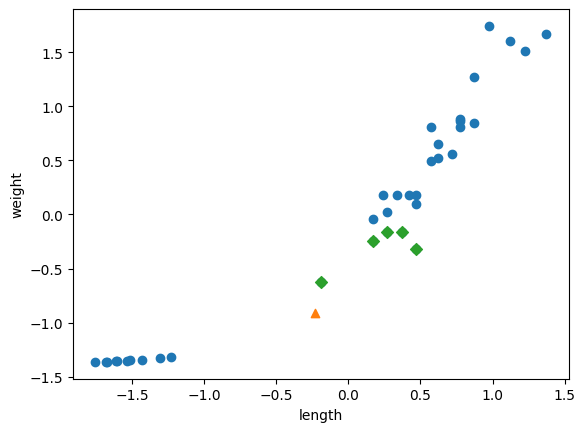

In [39]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0],
            train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()